In [1]:
import numpy as np
from pbcpy.grid import Grid_Space, Grid_Function, Grid_Function_Reciprocal
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
at = np.identity(3)
at[0][0]=2
print(at)

[[ 2.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [3]:
nr = [1001,1,1]
grid_sp = Grid_Space(at, nr, convention='',
                     reciprocal_convention='mic_reciprocal')
print(grid_sp.reciprocal_grid.r)

[[[[ 0.   0.   0. ]]]


 [[[ 0.5  0.   0. ]]]


 [[[ 1.   0.   0. ]]]


 ..., 
 [[[-1.5  0.   0. ]]]


 [[[-1.   0.   0. ]]]


 [[[-0.5  0.   0. ]]]]


# Test of grid 

I am doing this:
$\hat F(q) = \int dr F(r) e^{-2\pi i r\cdot q}$

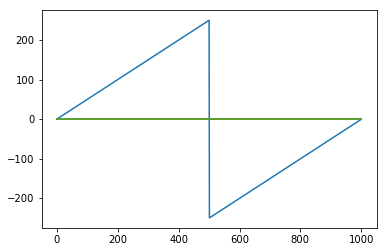

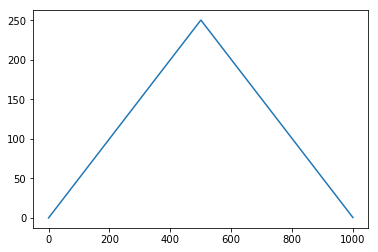

[[[ 0. ]]

 [[ 0.5]]

 [[ 1. ]]

 ..., 
 [[ 1.5]]

 [[ 1. ]]

 [[ 0.5]]]


In [4]:
invgrid = grid_sp.reciprocal_grid
plt.plot(invgrid.r[:,0,0])
plt.show()
plt.plot(invgrid.dist_grid_func().values[:,0,0])
plt.show()
print(invgrid.dist_grid_func().values)

In [5]:
alpha=0.1

In [6]:
dist_func = grid_sp.grid.dist_grid_func([0.5,0.,0.])
len_func = grid_sp.grid.square_len_func([0.5,0.,0.])

In [7]:
grid_gg = invgrid.dist_grid_func().values

In [8]:
#values = (1.0/(alpha*np.sqrt(2.0*np.pi)))*np.exp(-dist_func.values/(2.0*alpha**2))
#values = (1.0/(alpha*np.sqrt(2.0*np.pi)))*np.exp(-r_square(grid,[1,0,0])/(2.0*alpha**2))
values = (1.0/(alpha*np.sqrt(2.0*np.pi)))*np.exp(-len_func.values/(2.0*alpha**2))

In [9]:
dens = Grid_Function(grid_sp)

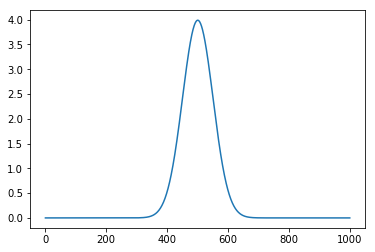

In [10]:
dens.values = values
plt.plot(dens.values[:,0,0])
plt.show()
#print(dens.values)

In [11]:
densFFT = dens.fft()

In [12]:
n=1
my_densFFT = np.zeros((np.shape(densFFT.values)[0],n),dtype=complex)
for i in np.arange(n):
    beta = alpha
    print(beta)
    my_densFFT[:,i] = np.exp(-2.0*(np.pi*grid_gg[:,0,0]*beta)**2
                            )*np.exp(2.0*np.pi*grid_gg[:,0,0]*1.0j)

0.1


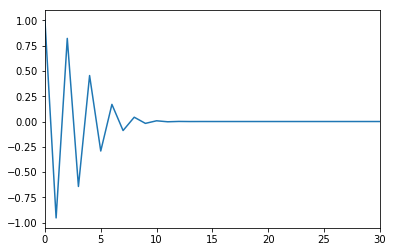

In [13]:
#plt.plot(np.real(densFFT[:,0,0]))
j=1
for i in np.arange(j):
    plt.plot(np.real(my_densFFT[:,i]))
#plt.plot(np.real(densFFT[:,0,0]))
plt.xlim([0,30])
plt.show()

In [15]:
test_func = Grid_Function_Reciprocal(grid_sp,griddata_3d=np.exp(-2*((np.pi*grid_gg*alpha)**2)))

In [16]:
print(test_func.values)

[[[ 1.        ]]

 [[ 0.95184981]]

 [[ 0.82086872]]

 ..., 
 [[ 0.64138063]]

 [[ 0.82086872]]

 [[ 0.95184981]]]


In [18]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(18,4))

In [19]:
ax1.plot(np.real(densFFT.values[:,0,0]))
ax2.plot(test_func.values[:,0,0])
ax3.plot(dens.values[:,0,0])
ax4.plot(np.real(densFFT.ifft().values[:,0,0]))

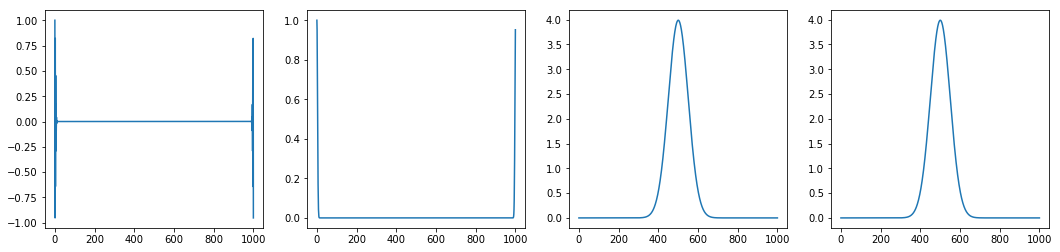

In [20]:
plt.show()

In [21]:
indx = np.where(grid_gg**2 > 0)

In [22]:
vh=np.zeros(grid_gg.shape,dtype=complex)
vh[indx] = FdensG[indx] * 4.0 * np.pi / grid_gg[indx]**2

NameError: name 'FdensG' is not defined

In [76]:
vh_plot = Grid_Function(grid=grid)

In [77]:
vh_plot.reciprocal_values=vh

In [78]:
vh_real = vh_plot.ifft()*grid.dV

In [79]:
vh_test = np.zeros(vh_real.shape,dtype=float)

In [80]:
vh_test = (1/np.sqrt(r_square(grid,[2.5,2.5,2.5])))+np.min(np.real(vh_real))

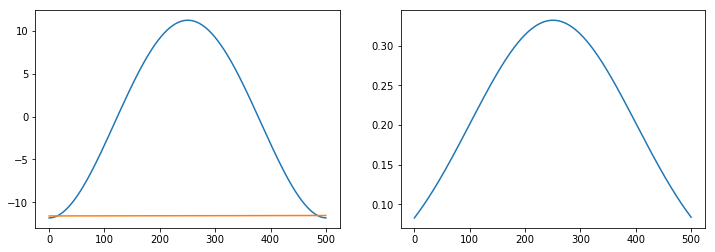

In [81]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(np.real(vh_real[:,0,0]))
ax1.plot(vh_test[:,0,0])
ax2.plot(dens.values[:,0,0])
plt.show()